In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

text_kwargs = dict(fontsize=24, color='black')
path = '/content/drive/MyDrive/Colab Notebooks/Hamoye Intership/Stage 1/immo_data.csv'
df = pd.read_csv(path)
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


### Cleaning

In [ ]:
# getting the number missing fields in each column
print(df.isnull().sum())

# checking for duplicates
df.duplicated().any()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

False

### Grouping the Regions

In [102]:
# clearing the duplicate cities to extra the cities from region1
region = df['regio1'].drop_duplicates().reset_index(drop=True)
print(region)

# grouping the regio1 cities
nordrhein_region = df.loc[df['regio1'] == region[0]]
rheinland_region = df.loc[df['regio1'] == region[1]]
sachsen_region = df.loc[df['regio1'] == region[2]]

bremen_region = df.loc[df['regio1'] == region[3]]
schleswig_region = df.loc[df['regio1'] == region[4]]
baden_region = df.loc[df['regio1'] == region[5]]

thüringen_region = df.loc[df['regio1'] == region[6]]
hessen_region = df.loc[df['regio1'] == region[7]]
niedersachsen_region = df.loc[df['regio1'] == region[8]]

bayern_region = df.loc[df['regio1'] == region[9]]
hamburg_region = df.loc[df['regio1'] == region[10]]
sachsen_an_region = df.loc[df['regio1'] == region[11]]

mecklenburg_region = df.loc[df['regio1'] == region[12]]
berlin_region = df.loc[df['regio1'] == region[13]]
brandenburg_region = df.loc[df['regio1'] == region[14]]
saarland_region = df.loc[df['regio1'] == region[15]]

df['street'].duplicated().any()

0        Nordrhein_Westfalen
1            Rheinland_Pfalz
2                    Sachsen
3                     Bremen
4         Schleswig_Holstein
5          Baden_Württemberg
6                  Thüringen
7                     Hessen
8              Niedersachsen
9                     Bayern
10                   Hamburg
11            Sachsen_Anhalt
12    Mecklenburg_Vorpommern
13                    Berlin
14               Brandenburg
15                  Saarland
Name: regio1, dtype: object


True


### Visualizing the most-expensive areas

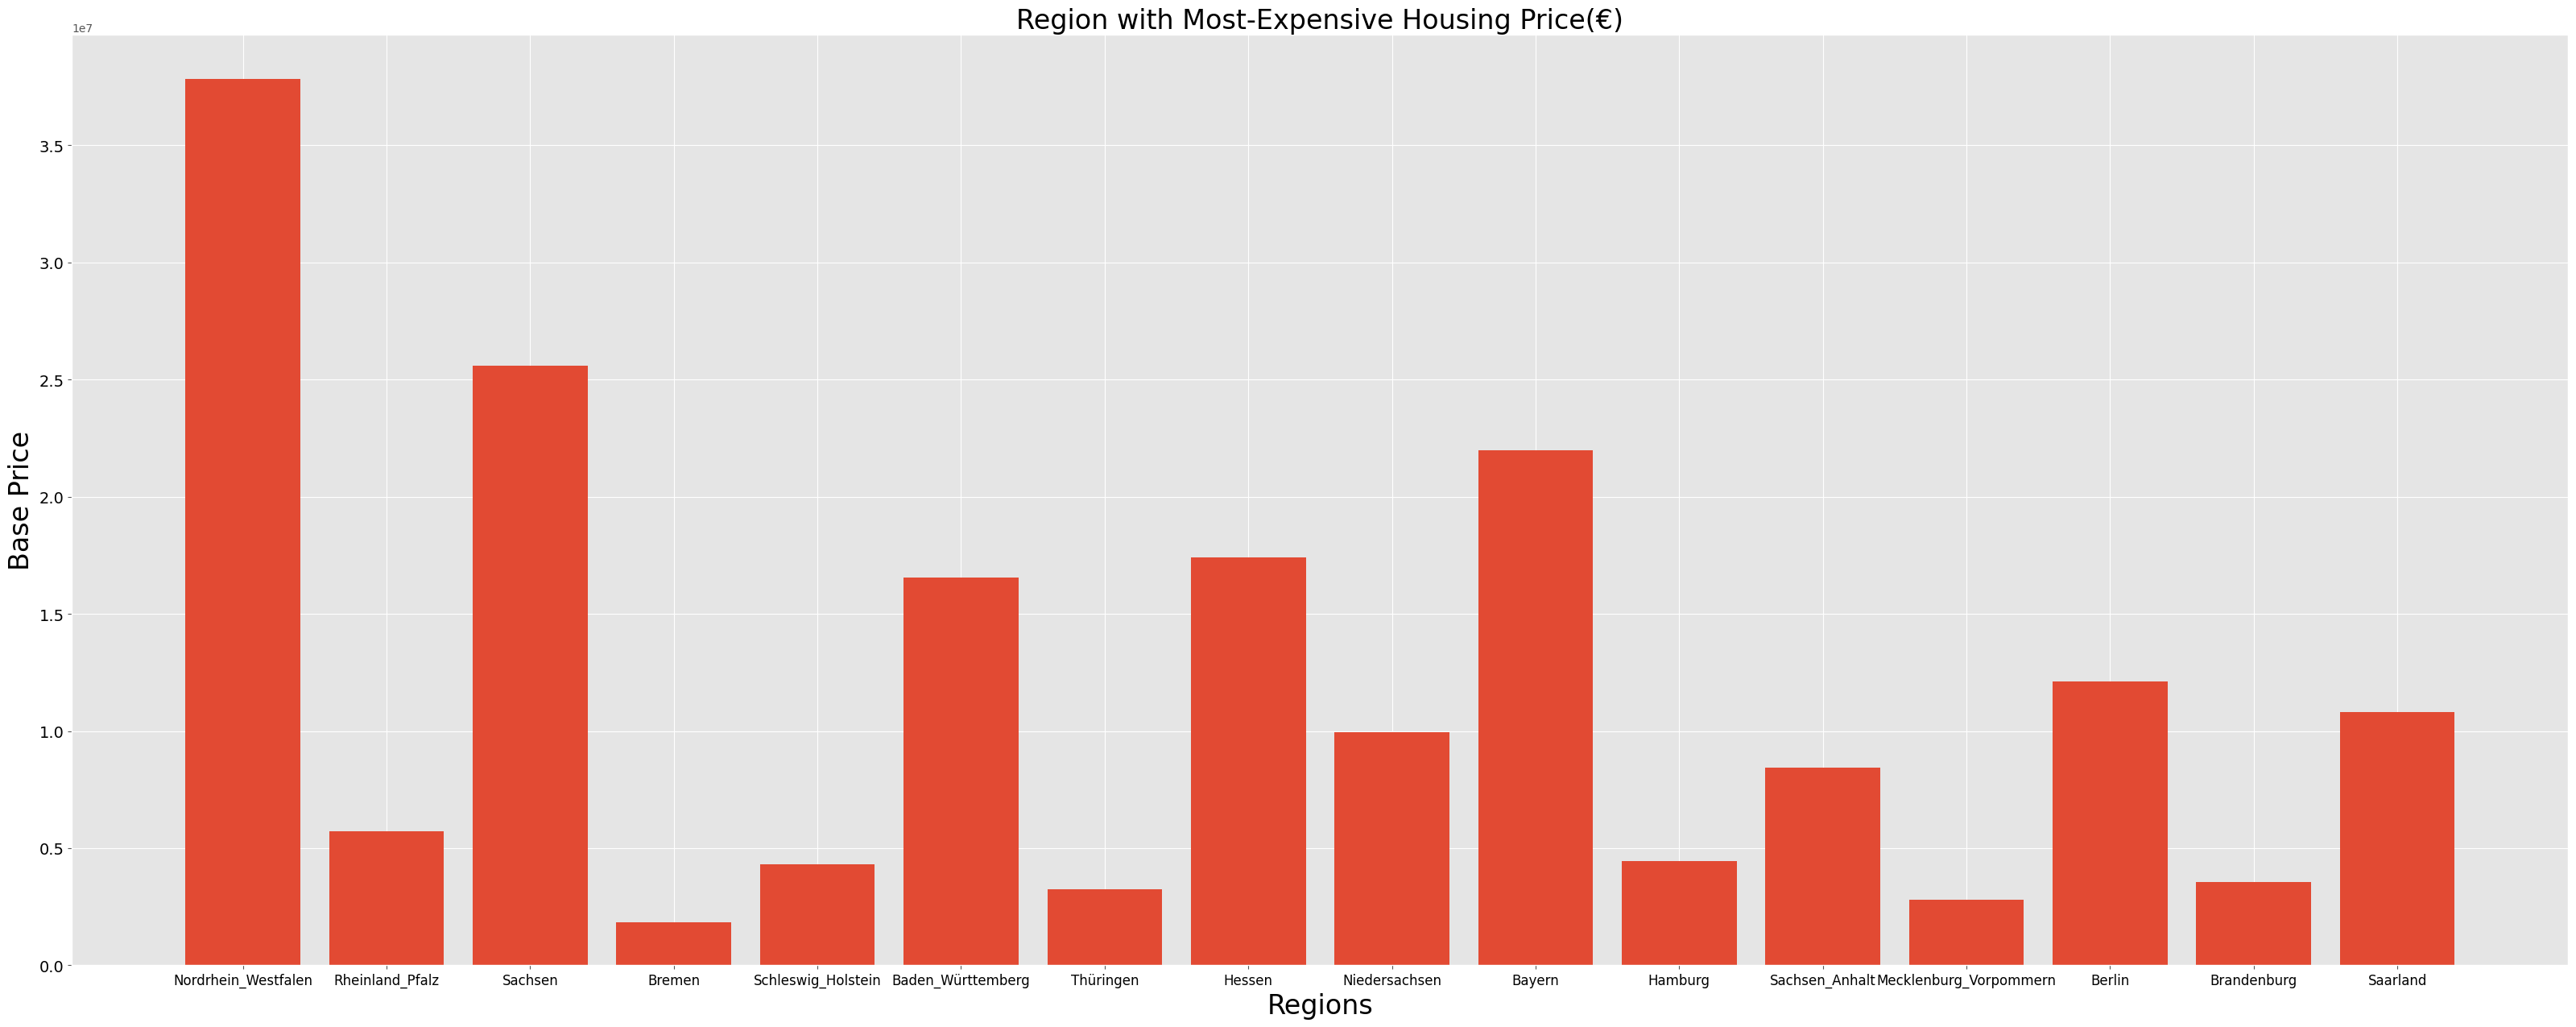

In [143]:
plt.figure(figsize=[40,15], dpi=100)
plt.style.use('ggplot')

prices = np.array([nordrhein_region['baseRent'].sum(), rheinland_region['baseRent'].sum(), sachsen_region['baseRent'].sum(),
                   bremen_region['baseRent'].sum(),schleswig_region['baseRent'].sum(),baden_region['baseRent'].sum(),thüringen_region['baseRent'].sum(),
                   hessen_region['baseRent'].sum(),niedersachsen_region['baseRent'].sum(),bayern_region['baseRent'].sum(),
                   hamburg_region['baseRent'].sum(),sachsen_an_region['baseRent'].sum(),mecklenburg_region['baseRent'].sum(),
                   berlin_region['baseRent'].sum(),brandenburg_region['baseRent'].sum(),saarland_region['baseRent'].sum()])

plt.bar(region, prices)
plt.title('Region with Most-Expensive Housing Price(€)', **text_kwargs)

plt.ylabel('Base Price', **text_kwargs)
plt.xlabel('Regions', **text_kwargs)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=14,  color='black')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/matplotlib/most expensive region.png')

plt.show()